# Evaluation of the Anomalies class

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn import tree

from nescience.anomalies import Anomalies

### Boston house price datasets

In this scenario we are interested to find if there are houses with an abnormaly low price, and why this is the case.

In [103]:
data = load_boston()
X    = data.data
y    = data.target

Train a knowledge model

In [104]:
model = Anomalies(X_type="mixed", y_type="numeric")
model.fit(X, y)

By default the model is a decision tree.

In [ ]:
dt = model.model

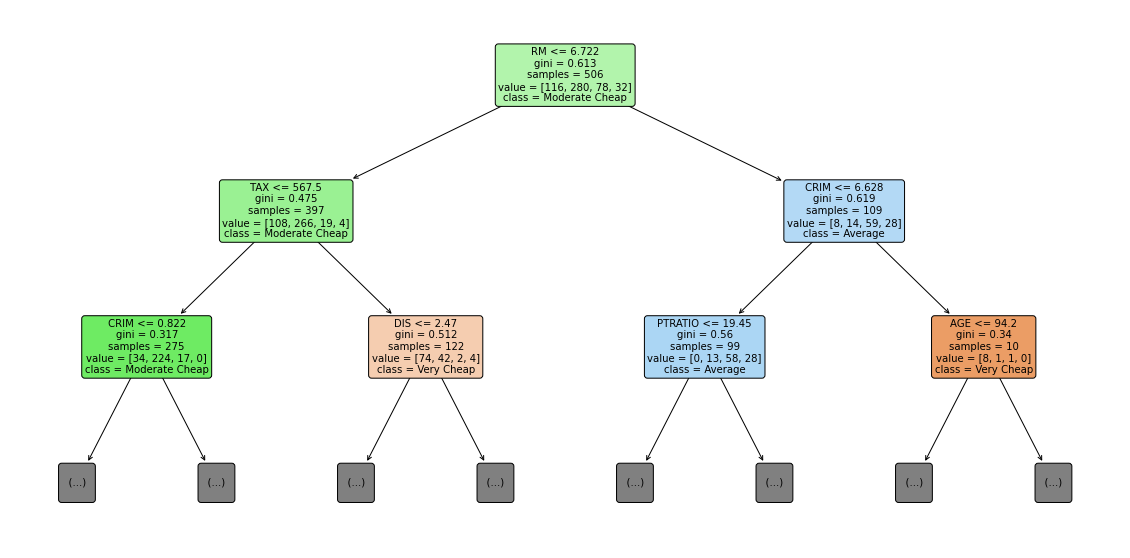

In [136]:
plt.figure(figsize=(20,10))
tree.plot_tree(dt, max_depth=2, feature_names=data.feature_names, rounded=True, filled=True,
               class_names=["Very Cheap", "Moderate Cheap", "Average", "Expensive"])
plt.show()

According to the knowledge model, the best attribute to classify a house according to its price is the number of rooms it has.

Let's see how many houses have been identified with an abnormaly low price.

In [105]:
anomalies = model.get_anomalies("smaller")
X.shape, anomalies.shape

((506, 13), (25,))

Let's see which are the best attributes that describe those anomalies.

In [106]:
model.get_classes(n_dims=1, an_type="smaller", filter_balancedness=True, filter_redundancy=False, filter_repeated_attrs=False)

,Attribute1,Attribute2,Inertia,N Class 0,N Class 1,Ratio
2,2,None,154.953975,9,16,0.36
4,4,None,0.090593,6,19,0.24
5,5,None,5.002437,17,8,0.68
7,7,None,20.352117,6,19,0.24
8,8,None,77.611111,18,7,0.72
9,9,None,41737.111111,7,18,0.28
10,10,None,26.577436,13,12,0.52
12,12,None,430.294828,18,7,0.72


Acording to the intertia, the best attribute that describes the anomales is the number 4. Let's see how the price is affected by this dimension.

In [116]:
lr = LinearRegression()
lr.fit(X[:,4].reshape(-1, 1), y)

LinearRegression()

Text(0, 0.5, 'Price')

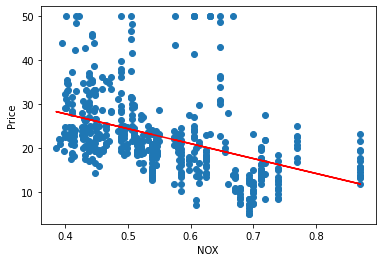

In [117]:
plt.scatter(X[:,4].reshape(-1, 1), y)
plt.plot(X[:,4], lr.intercept_ + lr.coef_ * X[:,4], color="red")
plt.xlabel(data.feature_names[4])
plt.ylabel("Price")

The price of the houses is smaller in those areas with higher levels of nitric oxides concentration. 

Let's see how anomalies are classifed in this dimension.

In [118]:
class0, class1 = model.get_class_points(attribute1=4, attribute2=None, an_type="smaller")

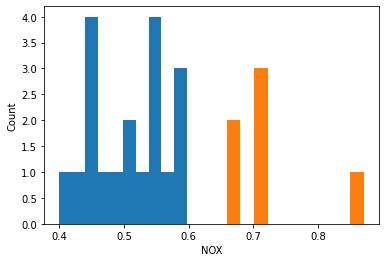

In [119]:
plt.hist(class0)
plt.hist(class1)
plt.ylabel("Count")
plt.xlabel(data.feature_names[4])
plt.show()

It seems there are some houses for which the prices does not match their characteristics, and it can be because the high level of nitric oxides concentration.